In [ ]:
%cd drive/MyDrive/DataMining/hw3

/content/drive/MyDrive/DataMining/hw3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
import statsmodels.api as sm
from statsmodels.api import OLS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ● Preprocessing



# <div dir="rtl">a:</div>

<div dir="rtl">


در این قسمت ابتدا مجموعه داده خوانده شده در دیتافریم ذخیره شده است. سپس با استفاده از تابع get_dummies ستون های month و day تبدیل شده اند.

<div>


In [ ]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df = pd.get_dummies(df, columns = ['day', 'month'])
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0





# <div dir="rtl">b:</div>

<div dir="rtl">


در این قسمت با استفاده از تابع isnull و sum تعداد مقادیر missing در هر ستون مشخص شده است. همان طور که مشخص است این تعداد برای همه ی ستون ها برابر صفر است.

<div>


In [ ]:
df.isnull().sum()

X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
day_fri      0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
month_apr    0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
dtype: int64


# <div dir="rtl">c:</div>

<div dir="rtl">


در این قسمت ابتدا با استفاده از دستور duplicated سطرهای تکراری نمایش داده شده اند. سپس با استفاده از دستور drop_duplicated این سطرها حذف شده اند.

<div>


In [ ]:
df[df.duplicated()]

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
53,4,3,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,0
100,3,4,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,0
215,4,4,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,0,1,0,0,0,0
303,3,6,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[df.duplicated()]

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep




# <div dir="rtl">d:</div>

<div dir="rtl">


در شکل زیر هیستوگرام متغیر area رسم شده است. همان طور که مشخص است کجی از سمت چپ وجود دارد.
مقدار عددی به دست آمده با تابع skew نیز گویای وجود این کجی است.

<div>


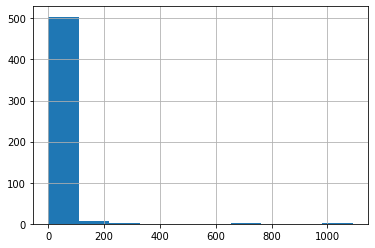

In [ ]:
df.area.hist()

In [ ]:
df.area.skew()

12.802213419146321



# <div dir="rtl">e:</div>

<div dir="rtl">

در این قسمت با استفاده از روش sqrt کجی هیستوگرام متغیر area برطرف شده است.


<div>


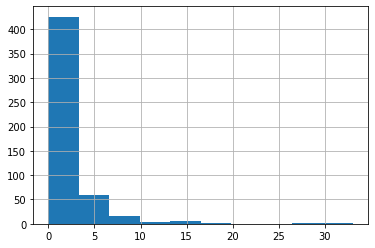

In [ ]:
df.area = np.sqrt(df.area)
df.area.hist()

In [ ]:
df.area.skew()

4.346061153147992




# <div dir="rtl">f:</div>

<div dir="rtl">

در شکل زیر به کمک تابع corr و heatmap همبستگی بین ویژگی های داده با متغیر هدف نشان داده شده است.

متغیر هدف area همبستگی پایینی با تک تک ویژگی ها دارد.

ویژگی دما در مقایسه با سایر ویژگی ها بیشترین همبستگی را با متغیر هدف دارد.    

پس از دما ویژگی های DMC، month_mar و month_sep بیشترین همبستگی را با متغیر هدف دارند.    

ویژگی های ISI، day_sun، day_wed، month_jul، month_apr و rain به ترتیب کمترین همبستگی را با متغیر هدف دارند. 

از بین ویژگی های مربوط به روز day_sat و از بین ویژگی های مربوط به ماه month_mar بیشترین همبستگی را با هدف دارند.

<div>


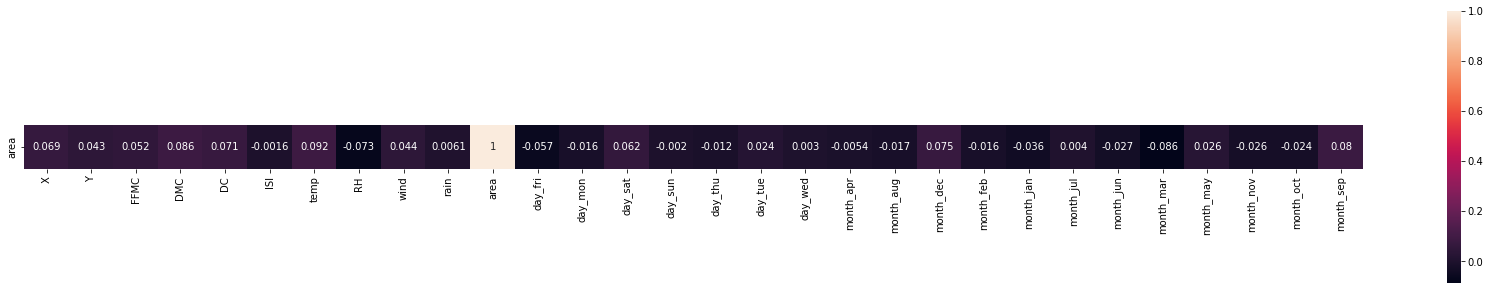

In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(30, 5)), 
sns.heatmap([corr['area']], annot=True, square=True, xticklabels=corr.columns, yticklabels=['area'])

### ● Feaure selection and Linear Regression



# <div dir="rtl">g:</div>

<div dir="rtl">

در این قسمت همه ی ستون ها به جز area در متغیر X و ستون area در متغیر y قرار گرفته است.


<div>


In [ ]:
l = list(df.columns)
l.remove('area')
X = df.loc[:, l]
y = df.loc[:, 'area']


# <div dir="rtl">h:</div>

<div dir="rtl">

در این قسمت به کمک تابع train_test_split داده ها به دو دسته ی train و test با نسبت 80٪ به 20٪ تقسیم شده اند.


<div>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)



# <div dir="rtl">i:</div>

<div dir="rtl">

در این قسمت به کمک تابع DummyRegressor یک مدل baseline با روش میانگین ساخته شده است و روی داده ی آموزشی آموزش داده شده است. سپس پیش بینی روی داده ی test انجام شده مقدار mse محاسبه شده است که برابر 8.83 است.


<div>


In [ ]:
dm = DummyRegressor(strategy='mean')
dm.fit(X_train, y_train)

DummyRegressor()

In [ ]:
y_pred = dm.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

8.838039167799035


# <div dir="rtl">j:</div>

<div dir="rtl">

در این قسمت آموزش روی داده های آموزشی و پیش بینی روی داده های تست با استفاده از مدل Linearregression انجام شده است و مقدار mse محاسبه شده است که برابر 11.41 است.


<div>


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

11.41199796737337

<div style="direction:rtl">
k)
با توجه به اینکه میانگین مربع خطا در مدل LinearRegression از مدل baseline بیشتر است میتوانیم نتیجه بگیریم که LinearRegressoin ضعیف تر از baseline است و عملکرد آن مناسب نیست.
<div>




# <div dir="rtl">l:</div>

<div dir="rtl">

در این قسمت به کمک تابع OLS مقدار p-value برای هر یک از ویژگی ها محاسبه شده است.

همبستگی محاسبه شده در قسمت f به تعیین کمیت همبستگی کمک میکند ولی مقدار p-value به ارزیابی واقعی بودن یک همبستگی کمک میکند. میزان همبستگی و مقدار p-value باید در کنار هم تفسیر شوند.
اگر مقدار p-value کم باشد (به طور کلی کمتر از 0.05) آنگاه همبستگی از نظر آماری معنادار است. اما اگر مقدار p-value کم نباشد همبستگی از نظر آماری معنادار نیست و نباید به آن تکیه کرد. 

برای مثال در نمودار heatmap ویژگی temp بیشترین همبستگی را با هدف دارد. اما مقدار p_value نشان میدهد که این همبستگی که این همبستگی 40٪ واقعی است.

ویژگی DMC پس از دما بیشترین همبستگی را با هدف دارد و مقدار p-value آن نشان میدهد که این همبستگی به اندازه ی 72٪ واقعی است.

<div>


In [ ]:
ols = OLS(y_train, sm.add_constant(X_train)).fit()
ols.pvalues.sort_values()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


temp         0.151806
wind         0.189613
month_jan    0.239927
month_mar    0.250970
ISI          0.297678
day_sat      0.301603
day_wed      0.324327
month_dec    0.341947
day_sun      0.357307
day_mon      0.383623
DC           0.398580
month_apr    0.439765
month_nov    0.441348
Y            0.464446
month_sep    0.509722
X            0.534072
RH           0.573319
month_feb    0.585971
const        0.589365
day_tue      0.596120
month_oct    0.598733
day_fri      0.640372
month_aug    0.641368
month_may    0.655660
day_thu      0.706589
month_jul    0.714227
FFMC         0.721076
month_jun    0.824859
rain         0.843061
DMC          0.998424
dtype: float64



# <div dir="rtl">m:</div>

<div dir="rtl">

در این قسمت ابتدا یک تابع به نام backeardElimination ایجاد شده است که در آن در یک حلقه به اندازه ی تعداد ویژگی ها وجود دارد. در هر iteration درون حلقه یک بار مقدار p-value برای ویژگی های باقی مانده محاسبه میشود و ویژگی هایی که p-value آن ها بیشینه است و از مقدار sl نیز بیشتر است حذف میشوند.
در نهایت داده های نهایی به همراه نام ویژگی هایی که حذف نشده اند بازگردانده میشوند.

در نهایت با استفاده از تابع تعریف شده عمل backward elimination انجام میشود.

<div>


In [ ]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, sm.add_constant(x)).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [ ]:
sl = 0.05
X2, columns = backwardElimination(X.values, y.values, sl, X.columns)

In [ ]:
list(columns)

['DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']





# <div dir="rtl">n:</div>

<div dir="rtl">

در این قسمت کلیه ی قسمت های h، i، j و k مجددا روی داده ی X2 اجرا شده است.

همان طور که مشخص است در این حالت به دلیل استفاده از ویژگی های با همبستگی واقعی تر، مدل LinearRegression نزدیک تر به baseline عمل میکند. ولی همچنان عملکرد آن ضعیف تر از baseline است.


<div>


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.8, random_state=42)

In [ ]:
dm = DummyRegressor(strategy='mean')
dm.fit(X2_train, y2_train)
y2_pred = dm.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
mse

8.838039167799035

In [ ]:
lr = LinearRegression()
lr.fit(X2_train, y2_train)
y2_pred = lr.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
mse

9.580271731690138

o)
در این قسمت با استفاده از Ridge مجددا عمل رگرسیون انجام شده است. همان طور که مشخص است معیار mse در این حالت در مقایسه با LinearRegression اندکی کاهش داشته است.
<br>
رگرسیون Ridge روشی است که برای تحلیل multicollinearity در داده های رگرسیون چندگانه استفاده میشود. این روش زمانی استفاده میشود که یک مجموعه داده دارای تعداد بیشتری متغیر پیش بینی کننده نسبت به تعداد مشاهدات باشد. کاربرد دیگر آن زمانی است است که در مجموعه داده multicollinearity وجود داشته باشد.
<br>
هنگامی که multicollinearity رخ میدهد، unbiase، least squates estimates میشود. اما واریانس آن ها بزرگ میشود. بنابراین ممکن است از مقدار واقعی دور باشد. با افزودن درجه ای از bias به تخمین های رگرسیون، رگرسیون خطی خطاهای استاندارد را کاهش میدهد.


In [ ]:
ridge = Ridge()
ridge.fit(X2_train, y2_train)
y2_pred = ridge.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
mse

9.576773938014341




p)
در این حالت با استفاده از elasticnet مجددا عمل رگرسیون انجام شده است. همان طور که مشخص است در این حالت معیار mse نسبت به مدل های قبلی کاهش داشته است.

رگرسیون ElasticNet یک مدل رگرسیونی است که هر دو روش نرمال سازی L1 و L2 را ترکیب میکند. در این مدل یک hyperparameter به نام آلفا برای تعیین وزن L1 و L2 در نظر گرفته شده است. regularization به مشکلات overfitting مدل ها کمک میکند. بنابراین ElasticNet یک روش رگرسیونی است که انتخاب متغیر و regularization را به طور همزمان انجام میدهد. با توجه به اینکه این مدل محدودیت های Lasso و Ridge را برطرف میکند معمولا بهتر از آن دو عمل میکند.


In [ ]:
elastic = ElasticNet()
elastic.fit(X2_train, y2_train)
y2_pred = elastic.predict(X2_test)
mse = mean_squared_error(y2_test, y2_pred)
mse

9.020476756202385



q)
در این قسمت مدل قبلی مجددا آموزش داده شده است و برای سنجش آن روی داده ی تست از معیار mae استفاده شده است.

با توجه به اینکه mse میانگین مربعات خطا را محاسبه میکند زمانی که اختلاف مقادیر پیش بینی شده و مقادیر واقعی بزرگتر از یک باشد مقدار mse از mae بزرگتر است که در اینجا این اتفاق افتاده است.



In [ ]:
elastic = ElasticNet()
elastic.fit(X2_train, y2_train)
y2_pred = elastic.predict(X2_test)
mae = mean_absolute_error(y2_test, y2_pred)
mae

1.972612568866016

### ● Model Selection 

r)
در این قسمت در یک حلقه هربار یک مدل ElasticNet با مقدار آلفا از یک تا 200 ساخته شده است. سپس میانگین خطای این مدل پس از 5 فولد اجرا محاسبه و در یک لیست ذخیره شده است.


In [ ]:
mean_mse = []
for alpha in range(1, 201):
    estimator = ElasticNet(alpha=alpha) 
    mse = cross_val_score(estimator = estimator, X = X_train, 
                          y = y_train,
                          scoring='neg_mean_squared_error',
                          cv = KFold(n_splits=5))
    mean_mse.append(np.abs(mse).mean())

s)
شکل زیر میانگین mse مدل ElasticNet را پس از هر اجرا بر حسب مقدار آلفا نشان میدهد.

همان طور که مشخص است به طور کلی با افزایش آلفا مقدار mse کاهش میابد.

از حدود مقدار 175 به بعد تغییرات mse کاهش پیدا میکند و تقریبا به یک مقدار ثابت میرسد. بنابراین مقدار بهینه برای آلفا میتواند مقدار 175 باشد که مقدار mse آن برابر 8.83 است. 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


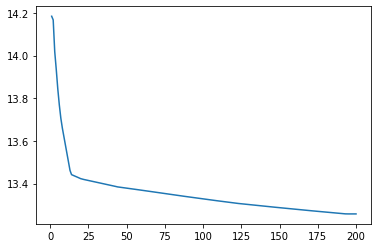

In [ ]:
x = list(range(1, 201))
y = mean_mse
sns.lineplot(x, y)

In [ ]:
elastic = ElasticNet(alpha=175)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

8.838039167799035